# 2) Cleaning and modeling
## 2.1) Import Dataset we scrapped from Reddit with 6 topics:

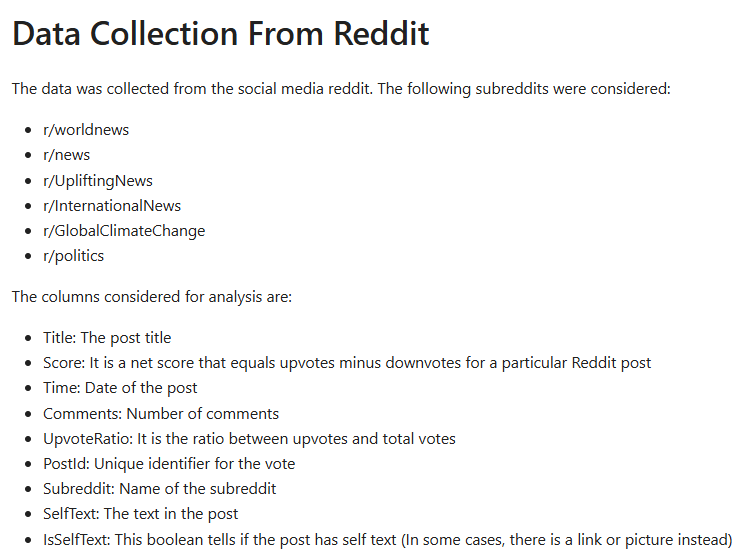

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/news.csv')

In [3]:
df.head(5)

,Title,Score,Time,Comments,UpvoteRatio,PostId,Subreddit,SelfText,IsSelfText
0,An anti-gay Hungarian politician has resigned ...,204544,1.606847e+09,8392,0.93,k4qide,worldnews,NaN,False
1,Trump Impeached for Abuse of Power,202899,1.576719e+09,20000,0.88,eclwg9,worldnews,NaN,False
2,Vladimir Putin's black belt revoked by interna...,200152,1.646081e+09,6904,0.89,t3pgaz,worldnews,NaN,False
3,"Two weeks before his inauguration, Donald J. T...",189351,1.531966e+09,18004,0.84,901p5f,worldnews,NaN,False
4,"Queen Elizabeth II has died, Buckingham Palace...",189029,1.662658e+09,16452,0.79,x96k3v,worldnews,NaN,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10363 entries, 0 to 10362
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        10363 non-null  object 
 1   Score        10363 non-null  int64  
 2   Time         10363 non-null  float64
 3   Comments     10363 non-null  int64  
 4   UpvoteRatio  10363 non-null  float64
 5   PostId       10363 non-null  object 
 6   Subreddit    10363 non-null  object 
 7   SelfText     265 non-null    object 
 8   IsSelfText   10363 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 657.9+ KB


In [5]:
df.isnull().sum()

Title              0
Score              0
Time               0
Comments           0
UpvoteRatio        0
PostId             0
Subreddit          0
SelfText       10098
IsSelfText         0
dtype: int64

In [6]:
data = df[['Title']]
data['index'] = data.index
documents = data
documents

C:\Users\darli\AppData\Local\Temp\ipykernel_29688\616288559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index'] = data.index


,Title,index
0,An anti-gay Hungarian politician has resigned ...,0
1,Trump Impeached for Abuse of Power,1
2,Vladimir Putin's black belt revoked by interna...,2
3,"Two weeks before his inauguration, Donald J. T...",3
4,"Queen Elizabeth II has died, Buckingham Palace...",4
...,...,...
10358,RFK Jr. had a ‘visceral’ reaction to tear-down...,10358
10359,Meet the Kentucky Republican Who Beat AIPAC: S...,10359
10360,Robert De Niro calls Trump a 'clown' outside t...,10360
10361,Skyrocketing rents and home prices may be pivo...,10361


In [7]:
print(len(documents))
documents[:5]

10363


,Title,index
0,An anti-gay Hungarian politician has resigned ...,0
1,Trump Impeached for Abuse of Power,1
2,Vladimir Putin's black belt revoked by interna...,2
3,"Two weeks before his inauguration, Donald J. T...",3
4,"Queen Elizabeth II has died, Buckingham Palace...",4


## 2.2) Data Preprocessing and cleaning

a. Tokenization

b. Remove words with 3 characters or less

c. Stopword removal

d. Lemmatization

e. Stemmers

In [8]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk import PorterStemmer, word_tokenize
import numpy as np
import nltk
from gensim.models import CoherenceModel

In [9]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\darli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\darli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\darli\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
# In these 2 functions we made all these steps:
#a. Tokenization
#b. Remove words with 3 characters or less
#c. Stopword removal
#d. Lemmatization
#e. Stemmers

def lemmatize_stemming(text):
  stemmer = PorterStemmer()
  # print("Text: ", text)

  lem_verb = WordNetLemmatizer().lemmatize(text, pos='v')
  # print("Lem verb: ", lem_verb)

  return stemmer.stem(lem_verb)


def preprocess(text):
  results = []

  for token in simple_preprocess(text):                          #by using simple_preprocess we made tokenization
    if (token not in STOPWORDS) and (len(token) > 3):            #then at the same time we remove the stop words we also filter any word less than 3 ch
      results.append(lemmatize_stemming(token))                  #finally re-use the previous function, which makes a lemmatizer first and then a stemming

  return results

In [11]:
doc_sample = documents[documents['index']==0].values[0][0]

print("Original Document: \n", doc_sample)
print(word_tokenize(doc_sample))

print("Processed Document: ")
print(preprocess(doc_sample))

Original Document: 
 An anti-gay Hungarian politician has resigned after being caught by police fleeing a 25-man orgy through a window
['An', 'anti-gay', 'Hungarian', 'politician', 'has', 'resigned', 'after', 'being', 'caught', 'by', 'police', 'fleeing', 'a', '25-man', 'orgy', 'through', 'a', 'window']
Processed Document: 
['anti', 'hungarian', 'politician', 'resign', 'catch', 'polic', 'flee', 'orgi', 'window']


In [12]:
processed_doc = documents.Title.map(preprocess)
processed_doc[:10]

0    [anti, hungarian, politician, resign, catch, p...
1                        [trump, impeach, abus, power]
2    [vladimir, putin, black, belt, revok, intern, ...
3    [week, inaugur, donald, trump, show, highli, c...
4    [queen, elizabeth, die, buckingham, palac, ann...
5    [senior, russian, offici, sign, open, letter, ...
6    [reject, evacu, offer, zelenski, say, need, an...
7    [anonym, leak, databas, russian, ministri, def...
8    [terabyt, leak, panamanian, shell, compani, da...
9    [kyiv, consensu, disconnect, russia, swift, ac...
Name: Title, dtype: object

## 2.3) Creating the Dictionary

## Bag of words on dataset

In [13]:
# from gensim.corpora import dictionary
# dictonary = gensim.corpora.Dictionary(processed_doc)
from gensim.corpora import Dictionary
dictonary = Dictionary(processed_doc)

count = 0

for k, v in dictonary.iteritems():
  print("Key: ", k, " Value: ", v)
  count +=1
  if count > 10:
    break

Key:  0  Value:  anti
Key:  1  Value:  catch
Key:  2  Value:  flee
Key:  3  Value:  hungarian
Key:  4  Value:  orgi
Key:  5  Value:  polic
Key:  6  Value:  politician
Key:  7  Value:  resign
Key:  8  Value:  window
Key:  9  Value:  abus
Key:  10  Value:  impeach


In [14]:
len(dictonary)

9247

## Filter of tokens that appears in

1. less than 5 documents
2. more than in 50% (0.5) of the documents
3. Keep only 10000 most frequent tokens

In [15]:
dictonary.filter_extremes(no_below=5, no_above=0.5, keep_n=10000)

In [16]:
len(dictonary)

3163

In [17]:
bow_corpus = [dictonary.doc2bow(doc) for doc in processed_doc]

In [18]:
bow_corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

In [19]:
bow_doc_0 = bow_corpus[0]
for i in range (len(bow_doc_0)):
  print("Word {} (\"{}\") appears {} times".format(bow_doc_0[i][0],
                                                  dictonary[bow_doc_0[i][0]],
                                                  bow_doc_0[i][1]))

Word 0 ("anti") appears 1 times
Word 1 ("catch") appears 1 times
Word 2 ("flee") appears 1 times
Word 3 ("polic") appears 1 times
Word 4 ("politician") appears 1 times
Word 5 ("resign") appears 1 times
Word 6 ("window") appears 1 times


## TF-IDF

In [20]:
# from gensim import corpora, models

# tfidf = models.TfidfModel(bow_corpus)
# corpus_tfidf = tfidf[bow_corpus]

# from pprint import pprint
# for doc in corpus_tfidf:
#   pprint(doc)
#   break

## 2.4) Building the Topic Model (LDA Model)

We are going to start with 5 topics

### 2.4.1) Building the LDA Model

In [21]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                       num_topics=5,
                                       id2word=dictonary,
                                       passes=2,
                                       workers=2
                                       )

### 2.4.2) View the Topics in LDA Model

In [22]:
for id, topic in lda_model.print_topics():
  print('Topic: {} \nWords: {}'.format(id, topic))

Topic: 0 
Words: 0.017*"studi" + 0.014*"israel" + 0.011*"global" + 0.011*"access" + 0.011*"open" + 0.009*"gaza" + 0.009*"warm" + 0.008*"isra" + 0.007*"emiss" + 0.007*"say"
Topic: 1 
Words: 0.033*"climat" + 0.018*"chang" + 0.017*"studi" + 0.012*"carbon" + 0.009*"warm" + 0.008*"global" + 0.007*"state" + 0.007*"biden" + 0.007*"open" + 0.007*"access"
Topic: 2 
Words: 0.040*"trump" + 0.010*"israel" + 0.010*"gaza" + 0.010*"say" + 0.010*"biden" + 0.008*"report" + 0.006*"global" + 0.006*"donald" + 0.006*"republican" + 0.006*"state"
Topic: 3 
Words: 0.025*"climat" + 0.018*"chang" + 0.013*"biden" + 0.013*"trump" + 0.011*"say" + 0.008*"elect" + 0.007*"year" + 0.006*"court" + 0.006*"right" + 0.004*"american"
Topic: 4 
Words: 0.015*"year" + 0.014*"trump" + 0.006*"world" + 0.006*"ukrain" + 0.006*"show" + 0.006*"say" + 0.005*"studi" + 0.005*"ocean" + 0.005*"money" + 0.005*"reveal"


It means the top 10 keywords that contribute to this Topic 0 are: ‘climate’, ‘change’, ‘time’.. and so on and the weight of ‘change’ on Topic 0 is 0.014.

The weights reflect how important a keyword is to that topic.

So here, we will manually choose the most appropriate name for every topic. For instance, for the 1st topic:

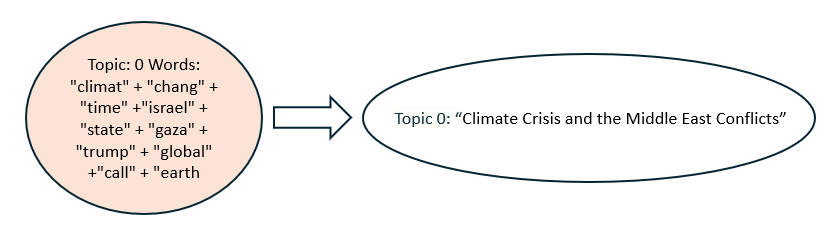

So, in summary, the names of the Topics:

Topic 0: Climate Crisis and the Middle East Conflicts

Topic 1: Trump, Climate Studies and Policy Debates

Topic 2: Climate Change Research and Emissions Analysis  

Topic 3: Climate Reports on Gaza and the Israeli-Palestinian Conflict

Topic 4: Biden, Trump and Global Emissions Debates

In [23]:
# Get topics in textual form from the trained LDA model
topics = lda_model.show_topics(num_topics=5, num_words=10)  # Adjust the number of topics and words as needed

# Print the topics
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")


Topic 0: 0.017*"studi" + 0.014*"israel" + 0.011*"global" + 0.011*"access" + 0.011*"open" + 0.009*"gaza" + 0.009*"warm" + 0.008*"isra" + 0.007*"emiss" + 0.007*"say"
Topic 1: 0.033*"climat" + 0.018*"chang" + 0.017*"studi" + 0.012*"carbon" + 0.009*"warm" + 0.008*"global" + 0.007*"state" + 0.007*"biden" + 0.007*"open" + 0.007*"access"
Topic 2: 0.040*"trump" + 0.010*"israel" + 0.010*"gaza" + 0.010*"say" + 0.010*"biden" + 0.008*"report" + 0.006*"global" + 0.006*"donald" + 0.006*"republican" + 0.006*"state"
Topic 3: 0.025*"climat" + 0.018*"chang" + 0.013*"biden" + 0.013*"trump" + 0.011*"say" + 0.008*"elect" + 0.007*"year" + 0.006*"court" + 0.006*"right" + 0.004*"american"
Topic 4: 0.015*"year" + 0.014*"trump" + 0.006*"world" + 0.006*"ukrain" + 0.006*"show" + 0.006*"say" + 0.005*"studi" + 0.005*"ocean" + 0.005*"money" + 0.005*"reveal"


In [24]:
#Categorizing a Sample Test Document:

# 1. Preprocess the sample text
def preprocess_text(text):
    results = []
    for token in simple_preprocess(text):
        if (token not in STOPWORDS) and (len(token) > 3):
            results.append(lemmatize_stemming(token))
    return results

# Sample text to test
#sample_text = "Donald Trump has been convicted recently."
#sample_text = "Missing from Euro 2024, Russia are slowly disappearing from football altogether"
sample_text = "Trump draws the most confidence for his physical and mental fitness for office than Biden."

# Preprocess the sample text
processed_sample_text = preprocess_text(sample_text)

# 2. Convert the preprocessed sample text to Bag-of-Words representation
bow_sample_text = dictonary.doc2bow(processed_sample_text)

# 3. Infer the topic distribution of the sample text using the trained LDA model
sample_text_topics = lda_model.get_document_topics(bow_sample_text)

# Print the topic distribution for the sample text
print("Topic Distribution for the Sample Text:")
for topic in sample_text_topics:
    print(f"Topic {topic[0]}: {topic[1]}")


Topic Distribution for the Sample Text:
Topic 0: 0.02544562891125679
Topic 1: 0.025323987007141113
Topic 2: 0.8984887599945068
Topic 3: 0.025467826053500175
Topic 4: 0.025273799896240234


sample_text has 57% of composition Topic 0 and 34% composition to Topic 2

In [25]:
# Step 4: Get document-topic distributions for the first 10 documents
doc_topics = lda_model.get_document_topics(bow_corpus[:10])

# Print document-topic distributions for the first 10 documents
for i, doc in enumerate(doc_topics):
    print(f"Document {i} topics: {doc}")

Document 0 topics: [(0, 0.025648616), (1, 0.025286453), (2, 0.02544605), (3, 0.42175546), (4, 0.5018634)]
Document 1 topics: [(0, 0.041288562), (1, 0.040490497), (2, 0.8369107), (3, 0.040719815), (4, 0.04059044)]
Document 2 topics: [(0, 0.02895668), (1, 0.029576058), (2, 0.0294659), (3, 0.29689306), (4, 0.6151083)]
Document 3 topics: [(0, 0.010829482), (1, 0.011039452), (2, 0.23919624), (3, 0.010929189), (4, 0.72800565)]
Document 4 topics: [(0, 0.033660308), (1, 0.8649597), (2, 0.033675876), (3, 0.033842158), (4, 0.0338619)]
Document 5 topics: [(0, 0.010944552), (1, 0.09172694), (2, 0.01079735), (3, 0.15147099), (4, 0.73506016)]
Document 6 topics: [(0, 0.020450933), (1, 0.020591673), (2, 0.02030358), (3, 0.7163105), (4, 0.22234327)]
Document 7 topics: [(0, 0.8838981), (1, 0.028968709), (2, 0.028819488), (3, 0.028868204), (4, 0.029445566)]
Document 8 topics: [(0, 0.73142415), (4, 0.24290705)]
Document 9 topics: [(0, 0.025731971), (1, 0.025816664), (2, 0.025387416), (3, 0.32994512), (4, 

"It means for Document 0, it belongs 2.59% to Topic 0, 2.53% to Topic 1, 42.98% to Topic 2, 49.34% to Topic 3, and 2.56% to Topic 4."

### 2.4.3) Compute the Model Perplexity and Coherence Score


We have 2 options to provide a measure to judge how good a given topic model is: Model perplexity and topic coherence.

We are going to estimate both. However, in this project we are going to use more Coherence Score

In [26]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_doc, dictionary=dictonary, coherence='c_v')   #c_v is using cosine similarity
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.680876811655833

Coherence Score:  0.3097071707286573


For Perplexity:
---------------
The perplexity score is a measure of how well the LDA model predicts the unseen data. Lower perplexity scores indicate better model performance. 

While there is no definitive threshold for a "good" perplexity score, values around -7 to -10 are generally considered acceptable for many text datasets


For Coherence Score:
---------------------
The coherence score measures the degree of semantic similarity between the top words in each topic. It ranges from 0 to 1, with higher values indicating better coherence and more interpretable topics.
A coherence score of 0.27583009412907156 is relatively low but not necessarily bad

As a general guideline, coherence scores above 0.5 are considered good, while scores below 0.3 may indicate potential issues with the topic model.

### 2.4.4) Word Clouds

Topic: studi israel global 
Words: ['studi', 'israel', 'global', 'access', 'open', 'gaza', 'warm', 'isra', 'emiss', 'say']

Topic: climat chang studi 
Words: ['climat', 'chang', 'studi', 'carbon', 'warm', 'global', 'state', 'biden', 'open', 'access']

Topic: trump israel gaza 
Words: ['trump', 'israel', 'gaza', 'say', 'biden', 'report', 'global', 'donald', 'republican', 'state']

Topic: climat chang biden 
Words: ['climat', 'chang', 'biden', 'trump', 'say', 'elect', 'year', 'court', 'right', 'american']

Topic: year trump world 
Words: ['year', 'trump', 'world', 'ukrain', 'show', 'say', 'studi', 'ocean', 'money', 'reveal']



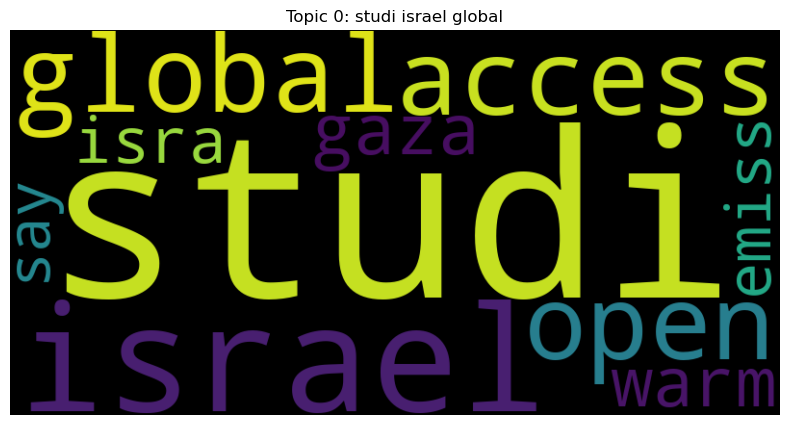

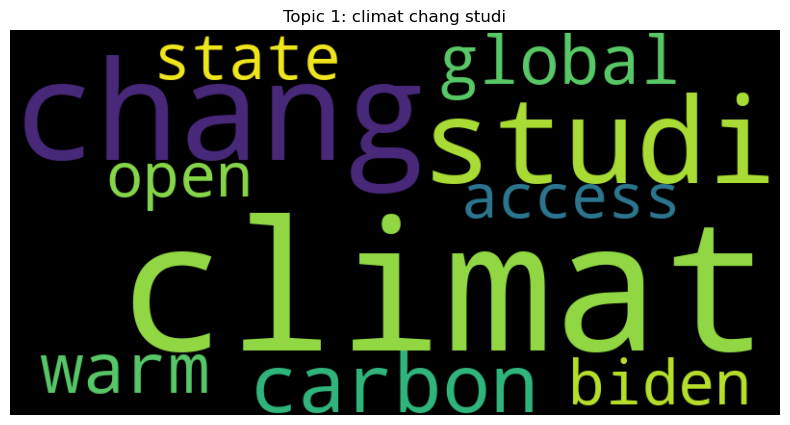

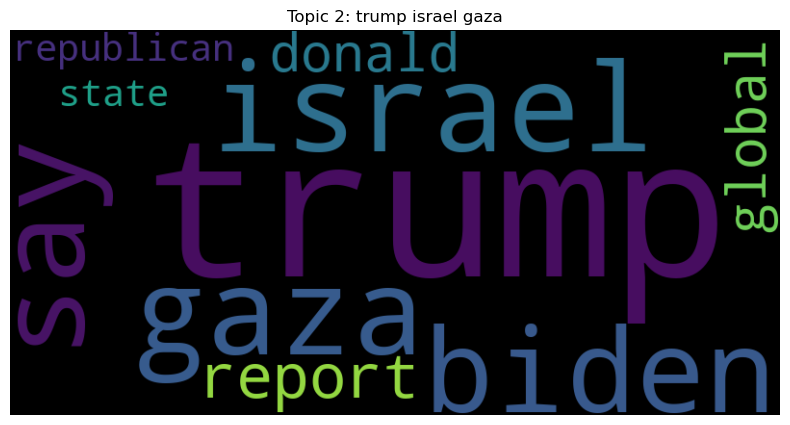

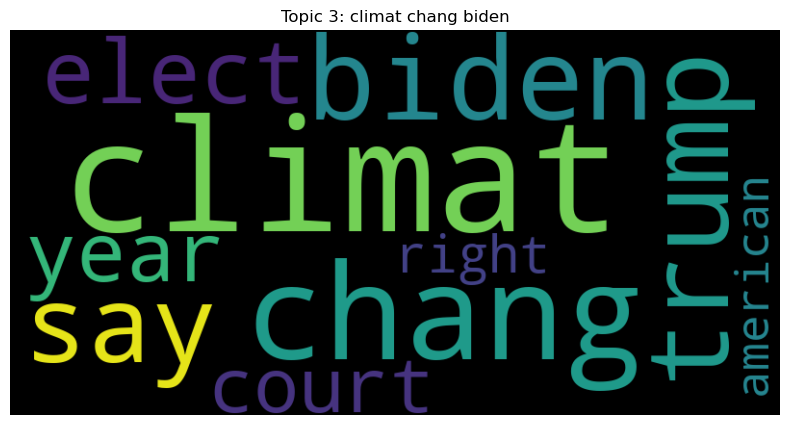

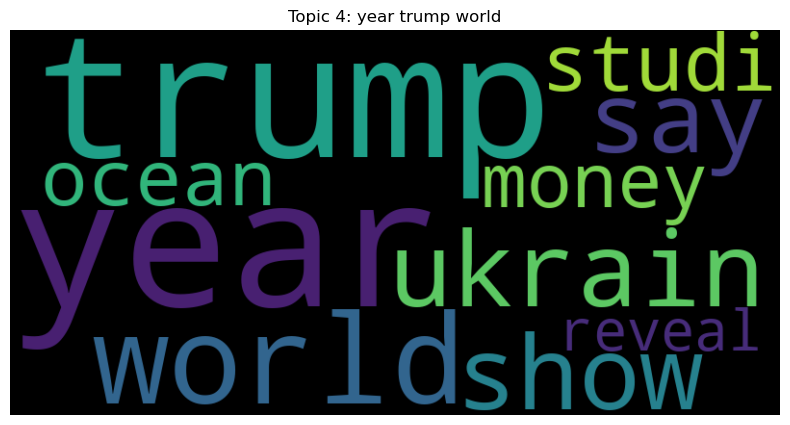

In [27]:
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 5: Generate automatic topic names and word clouds
def generate_topic_name(words):
    return ' '.join([word for word, _ in words[:3]])

topic_words = lda_model.show_topics(formatted=False)

# Create a dictionary to store topic names
topic_names = {i: generate_topic_name(words) for i, words in topic_words}

# Print topics with generated names
for idx, words in topic_words:
    topic_name = topic_names.get(idx, f"Topic {idx}")
    print(f"Topic: {topic_name} \nWords: {[word for word, _ in words]}\n")

# Step 6: Create word clouds for each topic
for idx, words in topic_words:
    word_freq = {word: freq for word, freq in words}
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {idx}: {topic_names[idx]}")
    plt.show()

In [28]:
#!pip install pyLDAvis

In [29]:
import pyLDAvis
import pyLDAvis.gensim

### 2.4.5) Visualize the topics-keywords

Using the pyLDAvis package to display in bubbles format similar to Tweeter and NY Times

In [30]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictonary, mds="mmds", R=30)
vis

C:\Users\darli\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.039009  0.108328       1        1  21.906137
0     -0.022920 -0.102975       2        1  20.802948
4     -0.104812 -0.006157       3        1  19.719272
1      0.097938 -0.062832       4        1  19.444397
3      0.068803  0.063636       5        1  18.127246, topic_info=        Term         Freq        Total Category  logprob  loglift
10     trump  1339.000000  1339.000000  Default  30.0000  30.0000
247   climat  1299.000000  1299.000000  Default  29.0000  29.0000
246    chang   772.000000   772.000000  Default  28.0000  28.0000
245    studi   786.000000   786.000000  Default  27.0000  27.0000
235   access   351.000000   351.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
1795    gaza    67.506474   598.433960   Topic5  -5.4913  -0.4743
76    global    65.533031   610.220000   Topic5  -5.5209  -0.5235
375    level    53.835258   257.483110   Topic5  -5.7176   0.1427
386     time    54.106378   284.894222   Topic5  -5.7125   0.0466
245    studi    53.793240   786.937570   Topic5  -5.7183  -0.9752

[426 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2295      1  0.904659  abbott
2295      2  0.100518  abbott
445       1  0.726461   abort
445       2  0.062626   abort
445       3  0.025050   abort
...     ...       ...     ...
144       5  0.169004    year
749       2  0.713387    zero
749       3  0.105687    zero
749       4  0.158530    zero
749       5  0.026422    zero

[1155 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 2, 4])